In [2]:
import convokit
from convokit import Corpus, download

In [2]:
corpus = Corpus(download('reddit-corpus', use_local=True))

Dataset already exists at /Users/calebchiam/.convokit/downloads/reddit-corpus


In [4]:
corpus.print_summary_stats()

Number of Speakers: 521777
Number of Utterances: 2004262
Number of Conversations: 84979


In [5]:
top_level_comment_ids = [utt.id for utt in corpus.iter_utterances() if utt.id == utt.meta['top_level_comment']]

In [9]:
corpus.random_utterance().root

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: utterance.root is deprecated and will be removed in a future release. Use utterance.conversation_id instead.


'7axc9n'

In [11]:
roots = set(utt.conversation_id for utt in corpus.iter_utterances())

In [17]:
from convokit import Utterance, Speaker
generic_utts = [Utterance(id=root, conversation_id=root, speaker=Speaker(id=root)) for root in roots]

In [18]:
corpus.add_utterances(generic_utts, with_checks=False)

In [19]:
corpus = corpus.reindex_conversations(top_level_comment_ids)

In [20]:
# corpus.print_summary_stats()

Number of Speakers: 521777
Number of Utterances: 2004262
Number of Conversations: 100000


In [21]:
import random

In [23]:
longest_paths = dict()

for convo in corpus.iter_conversations():
    longest_paths[convo.id] = random.choice(convo.get_longest_paths())
    convo.meta['longest_path_length'] = len(longest_paths[convo.id])

In [24]:
import seaborn as sns

In [25]:
convo_df = corpus.get_conversations_dataframe()

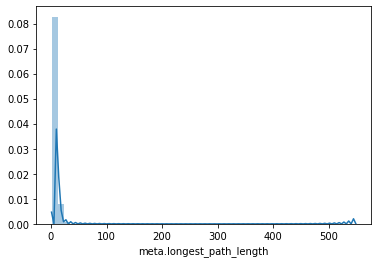

In [27]:
sns.distplot(convo_df['meta.longest_path_length'])

In [28]:
from collections import Counter

In [33]:
Counter(convo_df['meta.longest_path_length'] >= 20)

Counter({False: 98111, True: 1889})

In [36]:
for convo in corpus.iter_conversations():
    convo.meta['subreddit'] = convo.get_utterance(convo.id).meta['subreddit']

In [39]:
convo_df = corpus.get_conversations_dataframe()

In [42]:
ctr = Counter(convo_df[convo_df['meta.longest_path_length'] >= 20]['meta.subreddit'])

In [49]:
sorted(list(ctr.items()), key=lambda x: x[1])

[('Fitness', 1),
 ('Frugal', 2),
 ('magicTCG', 2),
 ('MMA', 2),
 ('askscience', 2),
 ('singapore', 2),
 ('MakeupAddiction', 2),
 ('funny', 2),
 ('books', 2),
 ('AskWomen', 3),
 ('relationships', 3),
 ('tifu', 3),
 ('DotA2', 3),
 ('Diablo', 3),
 ('baseball', 4),
 ('aww', 4),
 ('Marvel', 4),
 ('Android', 4),
 ('antiMLM', 4),
 ('trees', 4),
 ('The_Donald', 5),
 ('WTF', 5),
 ('2007scape', 5),
 ('MGTOW', 5),
 ('photography', 5),
 ('SquaredCircle', 5),
 ('science', 5),
 ('Python', 6),
 ('leagueoflegends', 6),
 ('guns', 6),
 ('Guildwars2', 6),
 ('cringepics', 6),
 ('gifs', 7),
 ('explainlikeimfive', 7),
 ('hockey', 7),
 ('anime', 8),
 ('apple', 8),
 ('CFB', 8),
 ('ShingekiNoKyojin', 8),
 ('skyrim', 8),
 ('lotr', 8),
 ('TwoXChromosomes', 8),
 ('pokemon', 8),
 ('TheRedPill', 9),
 ('MaliciousCompliance', 9),
 ('Music', 9),
 ('nba', 10),
 ('harrypotter', 10),
 ('Games', 10),
 ('videos', 10),
 ('soccer', 11),
 ('movies', 11),
 ('australia', 11),
 ('wow', 11),
 ('toronto', 12),
 ('raisedbynarcissis

In [34]:
Counter(convo_df['meta.longest_path_length'] >= 15)

Counter({False: 94415, True: 5585})

In [35]:
Counter(convo_df['meta.longest_path_length'] >= 10)

Counter({False: 74492, True: 25508})

In [51]:
filtered_utts = []
for convo in corpus.iter_conversations(lambda convo: convo.meta['longest_path_length'] >= 10):
    filtered_utts.extend(longest_paths[convo.id])

In [52]:
len(filtered_utts)

337112

In [54]:
filtered_utts = set(filtered_utts)

In [58]:
filtered_utt_ids = {utt.id for utt in filtered_utts}

In [59]:
filtered_corpus = corpus.filter_utterances_by(lambda utt: utt.id in filtered_utt_ids)

In [60]:
filtered_corpus.print_summary_stats()

Number of Speakers: 74931
Number of Utterances: 337112
Number of Conversations: 25508


In [62]:
for convo in filtered_corpus.iter_conversations():
    convo.check_integrity(verbose=False)

In [68]:
filtered_corpus.random_conversation().print_conversation_structure()

zmeul
    Wolffe_
        zmeul
            Wolffe_
                zmeul
                    Wolffe_
                        zmeul
                            Wolffe_
                                zmeul
                                    Wolffe_


In [69]:
import os
os.listdir()

['long-reddit-corpus-liwc-more-lite-trio',
 'long-reddit-corpus-liwc-lite',
 '.DS_Store',
 'utts.xlsx',
 'liwc_annotation.ipynb',
 'long-reddit-corpus-liwc-lite-trio',
 'long-reddit-corpus-focused-construction.ipynb',
 'long-reddit-corpus-liwc-more-lite',
 'long-reddit-corpus',
 'quick_stats.ipynb',
 'long-reddit-corpus-liwc',
 '.ipynb_checkpoints',
 'utts_liwc.xlsx',
 '~$utts_liwc.xlsx',
 'long-reddit-corpus-liwc-lite-gifs']

In [70]:
filtered_corpus.dump('long-reddit-corpus-focused', base_path='.')

### Annotation

In [3]:
filtered_corpus = Corpus(filename='long-reddit-corpus-focused')

In [4]:
import pandas as pd
from convokit import TextCleaner
from cleantext import clean

In [5]:
clean_str = lambda s: clean(s,
                            fix_unicode=True,               # fix various unicode errors
                            to_ascii=True,                  # transliterate to closest ASCII representation
                            lower=True,                     # lowercase text
                            no_line_breaks=True,           # fully strip line breaks as opposed to only normalizing them
                            no_urls=True,                  # replace all URLs with a special token
                            no_emails=True,                # replace all email addresses with a special token
                            no_phone_numbers=True,         # replace all phone numbers with a special token
                            no_numbers=False,               # replace all numbers with a special token
                            no_digits=False,                # replace all digits with a special token
                            no_currency_symbols=True,      # replace all currency symbols with a special token
                            no_punct=False,                 # fully remove punctuation
                            replace_with_url="<URL>",
                            replace_with_email="<EMAIL>",
                            replace_with_phone_number="<PHONE>",
                            replace_with_number="<NUMBER>",
                            replace_with_digit="0",
                            replace_with_currency_symbol="<CUR>",
                            lang="en"
                            )

In [6]:
tc = TextCleaner(text_cleaner=clean_str, verbosity=100000)

In [7]:
tc.transform(filtered_corpus)

100000/337112 utterances processed
200000/337112 utterances processed
300000/337112 utterances processed
337112/337112 utterances processed


In [17]:
utt_ids = []
utt_texts = []

for convo in filtered_corpus.iter_conversations():
    for utt in convo.iter_utterances():
        utt_ids.append(utt.id)
        utt_texts.append(utt.text)
        
df = pd.DataFrame([utt_ids, utt_texts]).T

df['id'] = df[0]
df['text'] = df[1]
del df[0]
del df[1]

In [18]:
df.to_excel('utts_path.xlsx')

In [4]:
df = pd.read_excel('utts_path_liwc.xlsx')

In [5]:
df = df.set_index('Source (B)')
del df['Source (A)']
del df['Source (C)']

In [6]:
for r in df.iterrows():
    utt_id = r[0]
    feats = r[1].to_dict()
    if filtered_corpus.has_utterance(utt_id):
        filtered_corpus.get_utterance(utt_id).meta['liwc'] = feats

In [7]:
cats = {'adverb', 'article', 'auxverb', 'conj', 'ipron', 'i', 'we', 'you', 'shehe', 'they', 'prep', 'negate', 
        'interrog', 'quant'}

In [8]:
for utt in filtered_corpus.iter_utterances():
    if 'liwc' in utt.meta:
        for cat in cats:
            utt.meta[cat] = utt.meta['liwc'][cat]

In [9]:
filtered_corpus.dump('long-reddit-corpus-focused-annotated', base_path='.')

### First 40 words annotation

In [13]:
from nltk.tokenize import sent_tokenize, word_tokenize 
  
text = "Natural language processing (NLP) is a field " + \
       "of computer science, artificial intelligence " + \
       "and computational linguistics concerned with " + \
       "the interactions between computers and human " + \
       "(natural) languages, and, in particular, " + \
       "concerned with programming computers to " + \
       "fruitfully process large natural language " + \
       "corpora. Challenges in natural language " + \
       "processing frequently involve natural " + \
       "language understanding, natural language" + \
       "generation frequently from formal, machine" + \
       "-readable logical forms), connecting language " + \
       "and machine perception, managing human-" + \
       "computer dialog systems, or some combination " + \
       "thereof."
  
print(word_tokenize(text))

['Natural language processing (NLP) is a field of computer science, artificial intelligence and computational linguistics concerned with the interactions between computers and human (natural) languages, and, in particular, concerned with programming computers to fruitfully process large natural language corpora.', 'Challenges in natural language processing frequently involve natural language understanding, natural languagegeneration frequently from formal, machine-readable logical forms), connecting language and machine perception, managing human-computer dialog systems, or some combination thereof.']

['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'field', 'of', 'computer', 'science', ',', 'artificial', 'intelligence', 'and', 'computational', 'linguistics', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', '(', 'natural', ')', 'languages', ',', 'and', ',', 'in', 'particular', ',', 'concerned', 'with', 'programming', 'computers', 'to

In [29]:
def get_first_60_tokens(text):
    return ' '.join(word_tokenize(text)[:60])

In [30]:
get_first_60_tokens(text)

'Natural language processing ( NLP ) is a field of computer science , artificial intelligence and computational linguistics concerned with the interactions between computers and human ( natural ) languages , and , in particular , concerned with programming computers to fruitfully process large natural language corpora . Challenges in natural language processing frequently involve natural language understanding , natural'

In [31]:
for utt in filtered_corpus.iter_utterances():
    utt.meta['first60tokens'] = get_first_60_tokens(utt.text)

In [32]:
utt_ids = []
utt_texts = []

for convo in filtered_corpus.iter_conversations():
    for utt in convo.iter_utterances():
        utt_ids.append(utt.id)
        utt_texts.append(utt.meta['first60tokens'])
        
df = pd.DataFrame([utt_ids, utt_texts]).T

df['id'] = df[0]
df['text'] = df[1]
del df[0]
del df[1]

In [33]:
df.to_excel('utts_60_tokens.xlsx')

In [37]:
df = pd.read_excel('utts_60_tokens_liwc.xlsx')

In [38]:
df = df.set_index('Source (B)')
del df['Source (A)']
del df['Source (C)']

In [39]:
for r in df.iterrows():
    utt_id = r[0]
    feats = r[1].to_dict()
    if filtered_corpus.has_utterance(utt_id):
        filtered_corpus.get_utterance(utt_id).meta['liwc'] = feats

In [41]:
cats = {'adverb', 'article', 'auxverb', 'conj', 'ipron', 'i', 'we', 'you', 'shehe', 'they', 'prep', 'negate', 
        'interrog', 'quant'}

In [42]:
for utt in filtered_corpus.iter_utterances():
    if 'liwc' in utt.meta:
        for cat in cats:
            utt.meta[cat] = utt.meta['liwc'][cat]

In [43]:
filtered_corpus.dump('long-reddit-corpus-focused-first60', base_path='.')